<a href="https://colab.research.google.com/github/LavanyaSurisetii/oasis/blob/main/Copy_of_vaishnav_technologies_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid - 19 Data Analysis Project using Python



Number of Rows and Columns: (57394, 49)

Data Types:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million 

<ipython-input-4-71757b70ee78>:63: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


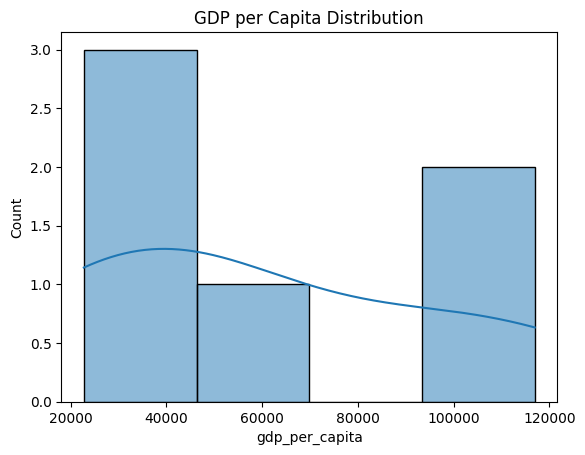

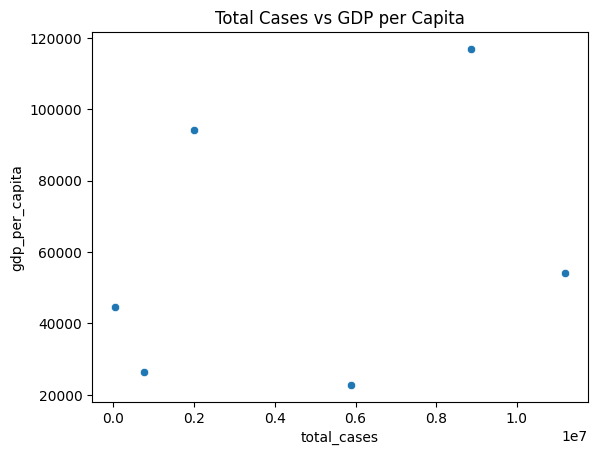

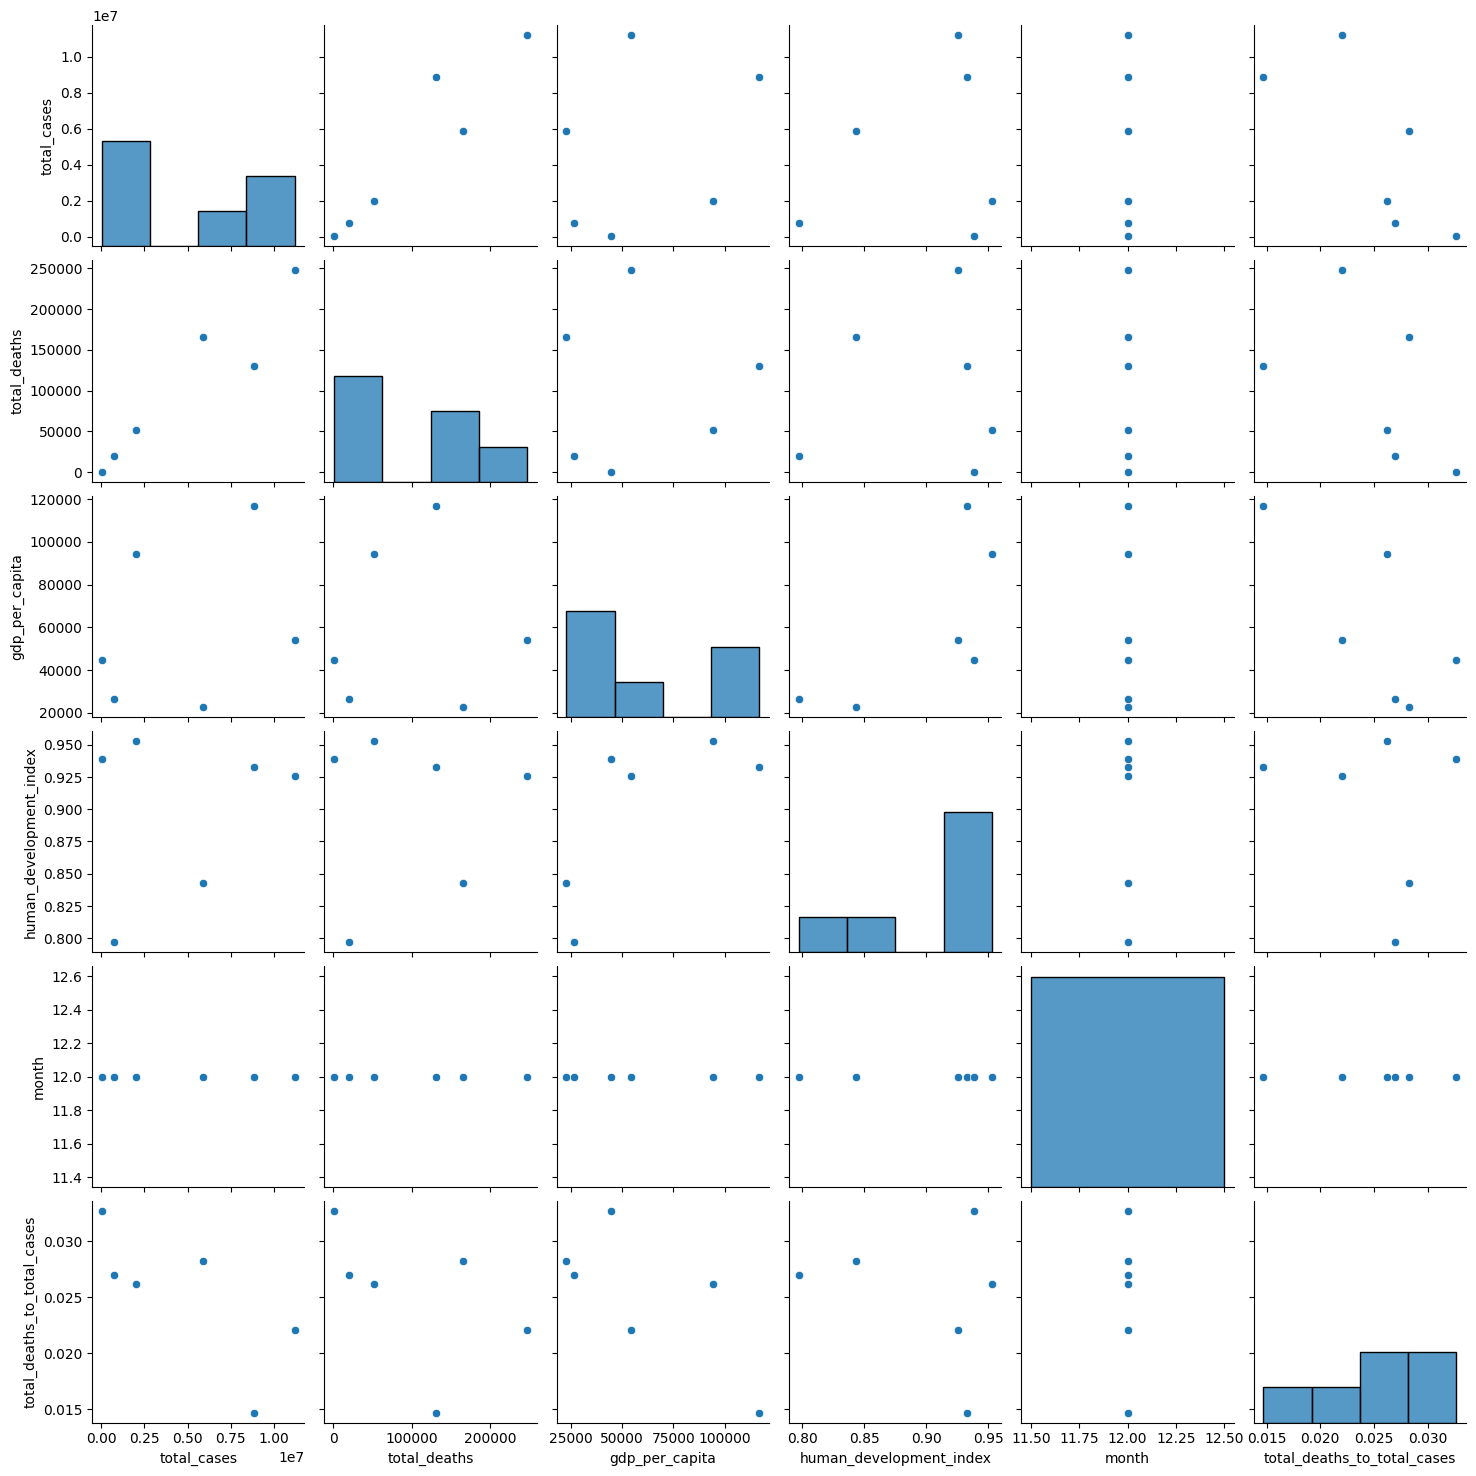

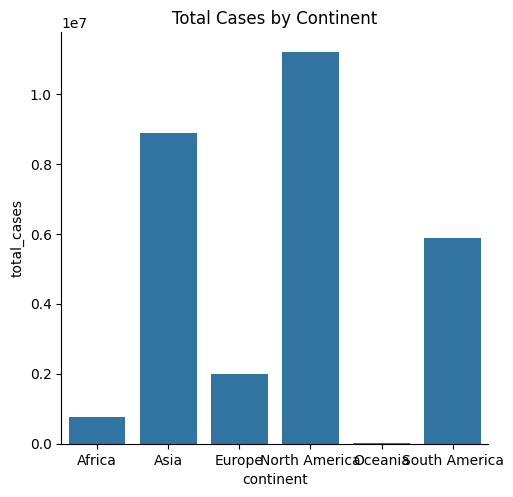


Data saved to 'df_groupby.csv'.


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import the dataset
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

# 2. High-Level Data Understanding
# a. Number of rows and columns
print("Number of Rows and Columns:", df.shape)

# b. Data types of columns
print("\nData Types:\n", df.dtypes)

# c. Info and describe
print("\nInfo:\n")
print(df.info())
print("\nDescriptive Statistics:\n", df.describe())

# 3. Low-Level Data Understanding
# a. Count of unique values in location
print("\nUnique Locations:", df['location'].nunique())

# b. Continent with maximum frequency
print("\nContinent with Maximum Frequency:\n", df['continent'].value_counts().idxmax())

# c. Maximum and mean value in 'total_cases'
print("\nMax Total Cases:", df['total_cases'].max())
print("Mean Total Cases:", df['total_cases'].mean())

# d. Quartile values in 'total_deaths'
print("\n25% Quartile in Total Deaths:", df['total_deaths'].quantile(0.25))
print("50% Quartile in Total Deaths:", df['total_deaths'].quantile(0.50))
print("75% Quartile in Total Deaths:", df['total_deaths'].quantile(0.75))

# e. Continent with maximum 'human_development_index'
print("\nContinent with Max Human Development Index:\n", df.groupby('continent')['human_development_index'].max().idxmax())

# f. Continent with minimum 'gdp_per_capita'
print("\nContinent with Min GDP per Capita:\n", df.groupby('continent')['gdp_per_capita'].min().idxmin())

# 4. Filter and update the dataframe
columns_to_keep = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df = df[columns_to_keep]

# 5. Data Cleaning
# a. Remove duplicates
df = df.drop_duplicates()

# b. Missing values in all columns
print("\nMissing Values:\n", df.isnull().sum())

# c. Remove observations where 'continent' is missing
df = df.dropna(subset=['continent'])

# d. Fill missing values with 0
df = df.fillna(0)

# 6. DateTime Format
# a. Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# b. Create a new column 'month'
df['month'] = df['date'].dt.month

# 7. Data Aggregation
# a. Group by 'continent' and find max values
df_groupby = df.groupby('continent').max().reset_index()

# 8. Feature Engineering
# a. Create 'total_deaths_to_total_cases' column
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

# 9. Data Visualization
# a. Univariate analysis of 'gdp_per_capita'
sns.histplot(df_groupby['gdp_per_capita'], kde=True)
plt.title("GDP per Capita Distribution")
plt.show()

# b. Scatter plot of 'total_cases' vs 'gdp_per_capita'
sns.scatterplot(data=df_groupby, x='total_cases', y='gdp_per_capita')
plt.title("Total Cases vs GDP per Capita")
plt.show()

# c. Pairplot of 'df_groupby'
sns.pairplot(df_groupby)
plt.show()

# d. Bar plot of 'continent' and 'total_cases'
sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar')
plt.title("Total Cases by Continent")
plt.show()

# 10. Save the DataFrame
df_groupby.to_csv("df_groupby.csv", index=False)
print("\nData saved to 'df_groupby.csv'.")
